In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


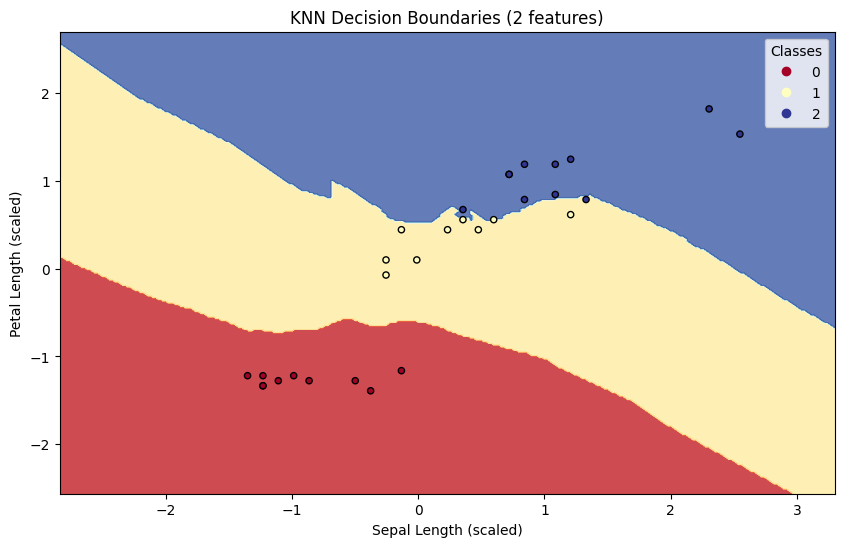

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use only two features for visualization simplicity (e.g., sepal length and petal length)
X_train_2d = X_train_scaled[:, [0, 2]]
X_test_2d = X_test_scaled[:, [0, 2]]

# Create a meshgrid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Train the KNN model on the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

# Predict the class for each point in the meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the contour plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Overlay the actual data points from the test set
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)

# Add labels, title, and legend
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.title('KNN Decision Boundaries (2 features)')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Iris dataset was successfully loaded, split into training and testing sets (80/20 split), and the features were scaled using `StandardScaler`.
*   A K-Nearest Neighbors model with `n_neighbors=5` was trained on the scaled training data.
*   The model achieved an accuracy of 1.0 on the test set.
*   The confusion matrix showed perfect classification for all three classes in the test set, with 10 instances of class 0, 9 instances of class 1, and 11 instances of class 2 correctly classified.
*   The decision boundaries of the KNN model were visualized using the scaled sepal length and petal length features, showing clear separation between the classes based on these two features.


